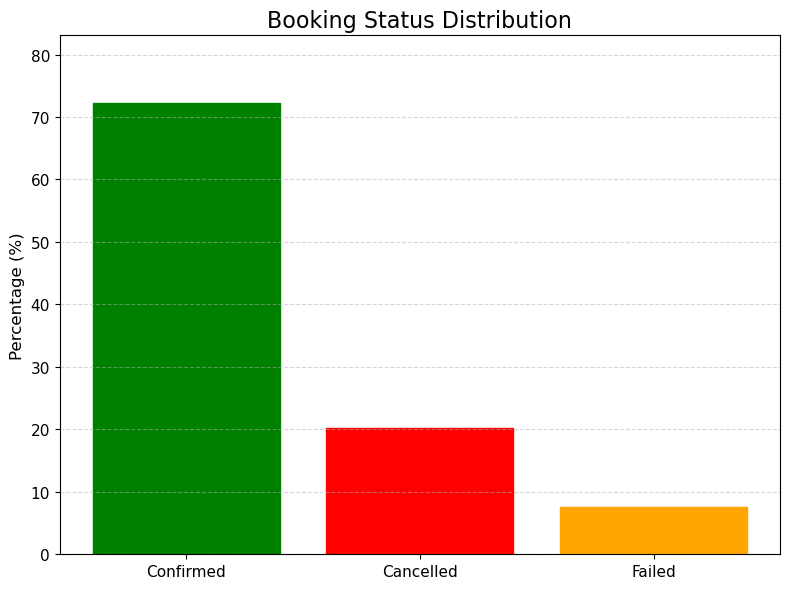

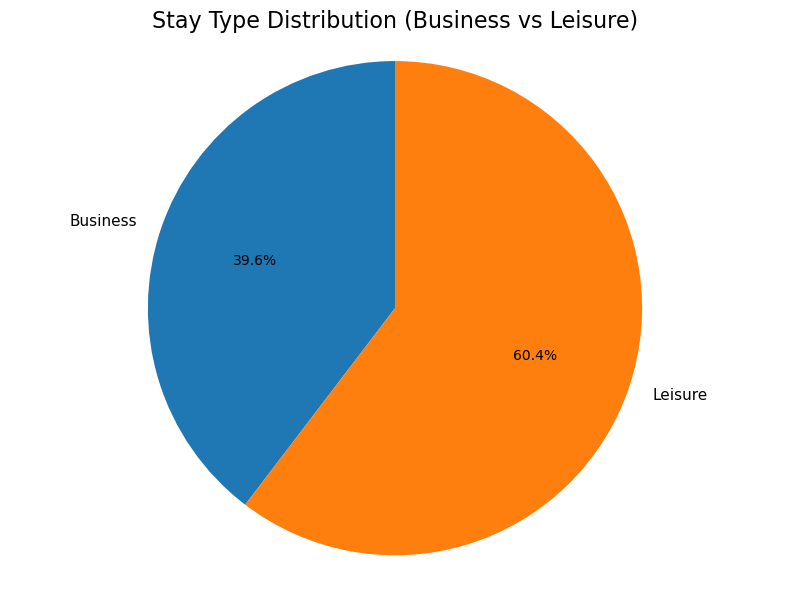

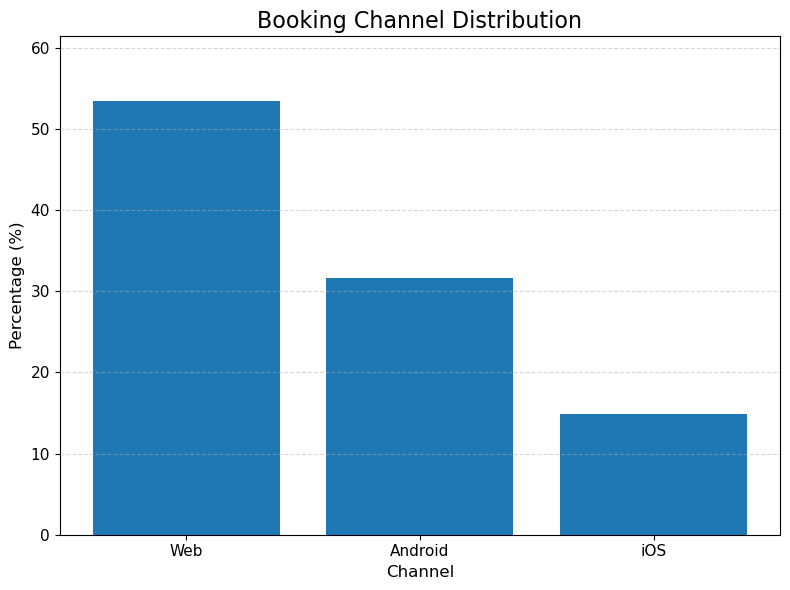

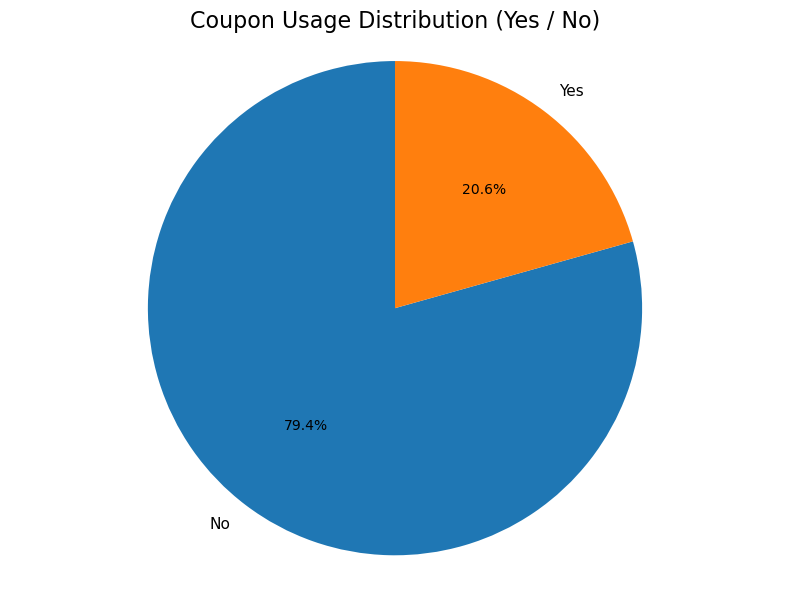

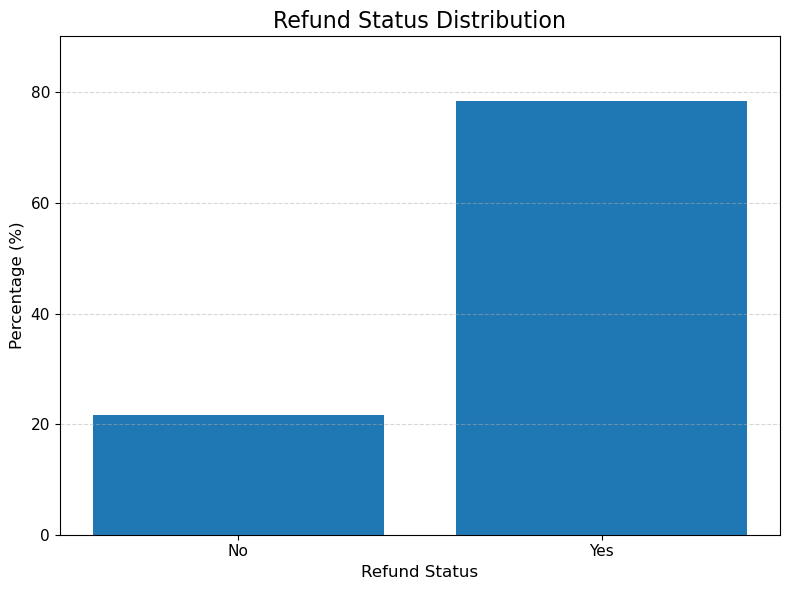


Numeric summary (percent):
Booking status:
 {'Cancelled': 20.23, 'Confirmed': 72.24, 'Failed': 7.53}
Stay type:
 {'Business': 39.63, 'Leisure': 60.37}
Booking channels:
 {'Android': 31.68, 'Web': 53.41, 'iOS': 14.91}
Coupon usage:
 {'No': 79.36, 'Yes': 20.64}
Refund status:
 {'No': 21.63, 'Yes': 78.37}


In [3]:
##1. Identify Key Observations:
## Highlight at least 3 meaningful trends or patterns in the data.
# analysis_and_plots.py
# Requires: pandas, matplotlib
# Run: python analysis_and_plots.py  (or run inside a Jupyter cell)

import pandas as pd
import matplotlib.pyplot as plt

# --- Config ---
file_path = 'Hotel_bookings_final.csv'  # change if necessary
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# --- Load data ---
df = pd.read_csv(file_path)

# --- Helper: percent series ---
def percent_series(series):
    """Return value_counts as percentages (0-100)."""
    return (series.value_counts(normalize=True) * 100).sort_index()

# --- Compute percentages for each trend ---
status_counts = percent_series(df['booking_status'])
stay_counts = percent_series(df['stay_type'])
channel_counts = percent_series(df['channel_of_booking'])
coupon_usage = percent_series(df['Coupon USed?'])
refund_status = percent_series(df['refund_status'])

# --- 1) Booking Status Distribution (bar) ---
plt.figure()
# ensure order: Confirmed, Cancelled, Failed if they exist
order = ['Confirmed', 'Cancelled', 'Failed']
values = [status_counts.get(k, 0) for k in order]
bars = plt.bar(order, values)
# optional color mapping
bars[0].set_color('green')   # Confirmed
if len(bars) > 1: bars[1].set_color('red')     # Cancelled
if len(bars) > 2: bars[2].set_color('orange')  # Failed
plt.title('Booking Status Distribution')
plt.ylabel('Percentage (%)')
plt.ylim(0, max(values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/booking_status_distribution.png', dpi=150)
plt.show()

# --- 2) Stay Type Distribution (pie) ---
plt.figure()
labels = stay_counts.index.tolist()
sizes = stay_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Stay Type Distribution (Business vs Leisure)')
plt.axis('equal')
plt.tight_layout()
# plt.savefig('/mnt/data/stay_type_distribution.png', dpi=150)
plt.show()

# --- 3) Booking Channel Distribution (bar) ---
plt.figure()
# order channels by percentage descending for clearer plot
ch_order = channel_counts.sort_values(ascending=False)
plt.bar(ch_order.index, ch_order.values)
plt.title('Booking Channel Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Channel')
plt.ylim(0, max(ch_order.values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/booking_channel_distribution.png', dpi=150)
plt.show()

# --- 4) Coupon Usage Distribution (pie) ---
plt.figure()
labels = coupon_usage.index.tolist()
sizes = coupon_usage.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Coupon Usage Distribution (Yes / No)')
plt.axis('equal')
plt.tight_layout()
# plt.savefig('/mnt/data/coupon_usage_distribution.png', dpi=150)
plt.show()

# --- 5) Refund Status Distribution (bar) ---
plt.figure()
refund_order = refund_status.sort_index()  # usually Yes / No
plt.bar(refund_order.index, refund_order.values)
plt.title('Refund Status Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Refund Status')
plt.ylim(0, max(refund_order.values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/refund_status_distribution.png', dpi=150)
plt.show()

# --- Print numeric summary (optional) ---
print("\nNumeric summary (percent):")
print("Booking status:\n", status_counts.round(2).to_dict())
print("Stay type:\n", stay_counts.round(2).to_dict())
print("Booking channels:\n", channel_counts.round(2).to_dict())
print("Coupon usage:\n", coupon_usage.round(2).to_dict())
print("Refund status:\n", refund_status.round(2).to_dict())